<a href="https://colab.research.google.com/github/MuskanSinhaPi/Intern/blob/main/Clubbed_Categories_%2B_Undersampling_%2B_Oversampling_SF_Crime_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google.colab
from google.colab import drive
import pandas as pd

#mounting drive
drive.mount('/content/drive')
# reading data
sf_crime=pd.read_csv("/content/drive/MyDrive/internship/Datasets/San Francisco Crime/SFCrime.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
Mounted at /content/drive


<ipython-input-2-8b48e36a179a>:8: DtypeWarning: Columns (0,29) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_crime=pd.read_csv("/content/drive/MyDrive/internship/Datasets/San Francisco Crime/SFCrime.csv")


###Feature Engineering

In [ ]:
sf_crime = sf_crime[['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict','Resolution', 'Address', 'X','Y']]

#Data Cleaning

# Drop rows with any missing values
sf_crime.dropna(inplace=True)
print(sf_crime.isnull().sum())

Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


In [ ]:
# Convert 'Date' and 'Time' columns to datetime because we can only use .dt accessor with datetimelike values
sf_crime['datetime'] = pd.to_datetime(sf_crime['Date'] + ' ' + sf_crime['Time'])

# Extract relevant features
sf_crime['year'] = sf_crime['datetime'].dt.year
sf_crime['hour'] = sf_crime['datetime'].dt.hour
sf_crime['month'] = sf_crime['datetime'].dt.month
sf_crime['day_of_week'] = sf_crime['datetime'].dt.dayofweek
sf_crime['day'] = pd.to_datetime(sf_crime['datetime']).dt.day
sf_crime['minute'] = pd.to_datetime(sf_crime['datetime']).dt.minute

In [ ]:
print(sf_crime.columns)

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'datetime', 'year', 'hour', 'month',
       'day_of_week', 'day', 'minute'],
      dtype='object')


In [ ]:
# Filter data for years before 2018 for training and use 2018 for testing
train_df = sf_crime[sf_crime['year'] < 2018]
test_df = sf_crime[sf_crime['year'] == 2018]

In [ ]:
train_df.shape

(1192663, 17)

In [ ]:
test_df.shape

(738, 17)

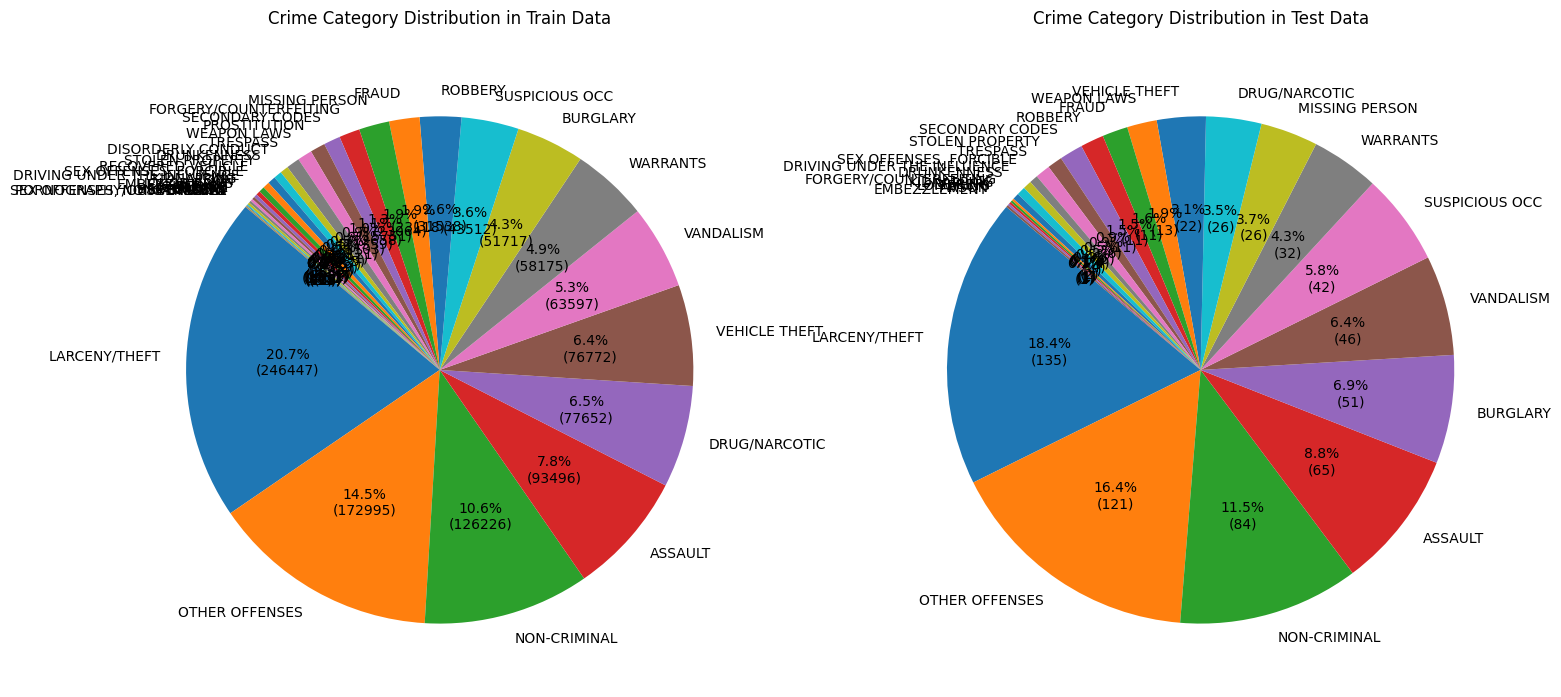

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_df and test_df are your dataframes and they have a column 'Category' for crime types

# Calculate the distribution of crime categories in train_df
train_category_counts = train_df['Category'].value_counts()
train_category_labels = train_category_counts.index
train_category_sizes = train_category_counts.values

# Calculate the distribution of crime categories in test_df
test_category_counts = test_df['Category'].value_counts()
test_category_labels = test_category_counts.index
test_category_sizes = test_category_counts.values

# Function to format the labels
def autopct_format(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# Plot pie chart for train_df
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.pie(train_category_sizes, labels=train_category_labels, autopct=lambda pct: autopct_format(pct, train_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Train Data\n')

# Plot pie chart for test_df
plt.subplot(1, 2, 2)
plt.pie(test_category_sizes, labels=test_category_labels, autopct=lambda pct: autopct_format(pct, test_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Test Data\n')

plt.show()

In [ ]:
print(train_df['Category'].unique())
print()
print("Number of Categories of Crime")
print(len(train_df['Category'].unique()))

['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']

Number of Categories of Crime
37


In [ ]:
print(test_df['Category'].unique())
print()
print("Number of Categories of Crime")
print(len(test_df['Category'].unique()))

['LARCENY/THEFT' 'NON-CRIMINAL' 'OTHER OFFENSES' 'VANDALISM'
 'SUSPICIOUS OCC' 'ASSAULT' 'WARRANTS' 'BURGLARY' 'DRUG/NARCOTIC'
 'VEHICLE THEFT' 'MISSING PERSON' 'WEAPON LAWS' 'DRUNKENNESS'
 'SECONDARY CODES' 'SEX OFFENSES, FORCIBLE' 'STOLEN PROPERTY' 'FRAUD'
 'TRESPASS' 'KIDNAPPING' 'DRIVING UNDER THE INFLUENCE' 'ROBBERY' 'BRIBERY'
 'FORGERY/COUNTERFEITING' 'LOITERING' 'ARSON' 'EMBEZZLEMENT']

Number of Categories of Crime
26


In [ ]:
# Create a mapping dictionary for the new categories
category_mapping = {
    'ROBBERY': 'Violent Crimes',
    'VEHICLE THEFT': 'Property Crimes',
    'ARSON': 'Violent Crimes',
    'ASSAULT': 'Violent Crimes',
    'TRESPASS': 'Miscellaneous',
    'BURGLARY': 'Property Crimes',
    'LARCENY/THEFT': 'Property Crimes',
    'WARRANTS': 'Administrative and Other Offenses',
    'OTHER OFFENSES': 'Administrative and Other Offenses',
    'DRUG/NARCOTIC': 'Drug and Alcohol Related',
    'SUSPICIOUS OCC': 'Miscellaneous',
    'LIQUOR LAWS': 'Drug and Alcohol Related',
    'VANDALISM': 'Property Crimes',
    'WEAPON LAWS': 'Violent Crimes',
    'NON-CRIMINAL': 'Non-Criminal and Special Cases',
    'MISSING PERSON': 'Non-Criminal and Special Cases',
    'FRAUD': 'Property Crimes',
    'SEX OFFENSES, FORCIBLE': 'Violent Crimes',
    'SECONDARY CODES': 'Administrative and Other Offenses',
    'DISORDERLY CONDUCT': 'Public Order Crimes',
    'RECOVERED VEHICLE': 'Non-Criminal and Special Cases',
    'KIDNAPPING': 'Violent Crimes',
    'FORGERY/COUNTERFEITING': 'Property Crimes',
    'PROSTITUTION': 'Public Order Crimes',
    'DRUNKENNESS': 'Drug and Alcohol Related',
    'BAD CHECKS': 'White Collar Crimes',
    'DRIVING UNDER THE INFLUENCE': 'Drug and Alcohol Related',
    'LOITERING': 'Public Order Crimes',
    'STOLEN PROPERTY': 'Property Crimes',
    'SUICIDE': 'Non-Criminal and Special Cases',
    'BRIBERY': 'White Collar Crimes',
    'EXTORTION': 'White Collar Crimes',
    'EMBEZZLEMENT': 'Property Crimes',
    'GAMBLING': 'Public Order Crimes',
    'PORNOGRAPHY/OBSCENE MAT': 'Non-Criminal and Special Cases',
    'SEX OFFENSES, NON FORCIBLE': 'Violent Crimes',
    'TREA': 'Non-Criminal and Special Cases'
}

# Replace the original 'Category' column with the new categories
sf_crime['Category'] = sf_crime['Category'].map(category_mapping)
train_df['Category'] = train_df['Category'].map(category_mapping)
test_df['Category'] = test_df['Category'].map(category_mapping)

<ipython-input-12-27c64f4601a1>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Category'] = train_df['Category'].map(category_mapping)
<ipython-input-12-27c64f4601a1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Category'] = test_df['Category'].map(category_mapping)


In [ ]:
print(train_df['Category'].unique())
print()
print("Number of Categories of Crime in Train Data")
print(len(train_df['Category'].unique()))
print()
print()
print(test_df['Category'].unique())
print()
print("Number of Categories of Crime in Test Data")
print(len(test_df['Category'].unique()))

['Violent Crimes' 'Property Crimes' 'Miscellaneous'
 'Administrative and Other Offenses' 'Drug and Alcohol Related'
 'Non-Criminal and Special Cases' 'Public Order Crimes'
 'White Collar Crimes']

Number of Categories of Crime in Train Data
8


['Property Crimes' 'Non-Criminal and Special Cases'
 'Administrative and Other Offenses' 'Miscellaneous' 'Violent Crimes'
 'Drug and Alcohol Related' 'White Collar Crimes' 'Public Order Crimes']

Number of Categories of Crime in Test Data
8


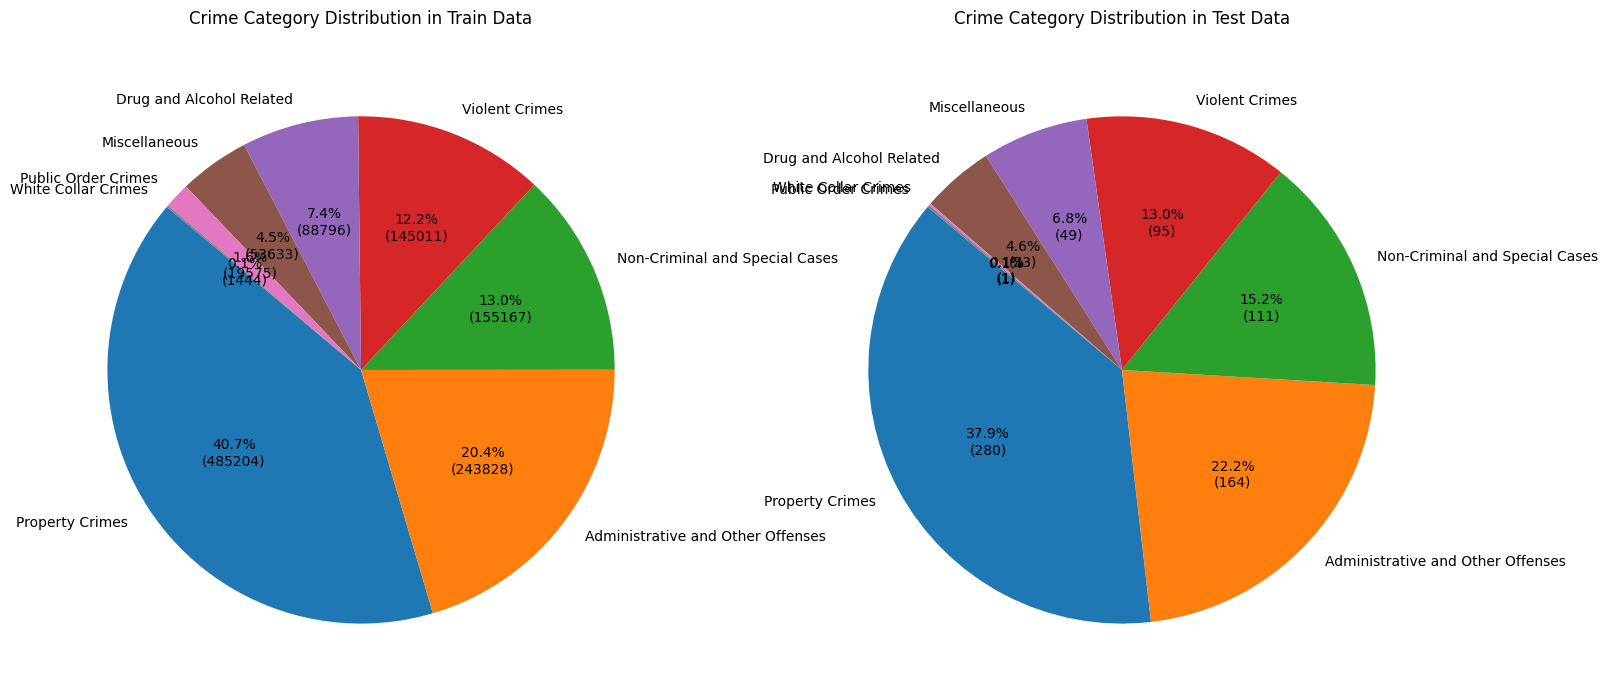

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_df and test_df are your dataframes and they have a column 'Category' for crime types

# Calculate the distribution of crime categories in train_df
train_category_counts = train_df['Category'].value_counts()
train_category_labels = train_category_counts.index
train_category_sizes = train_category_counts.values

# Calculate the distribution of crime categories in test_df
test_category_counts = test_df['Category'].value_counts()
test_category_labels = test_category_counts.index
test_category_sizes = test_category_counts.values

# Function to format the labels
def autopct_format(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# Plot pie chart for train_df
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.pie(train_category_sizes, labels=train_category_labels, autopct=lambda pct: autopct_format(pct, train_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Train Data\n')

# Plot pie chart for test_df
plt.subplot(1, 2, 2)
plt.pie(test_category_sizes, labels=test_category_labels, autopct=lambda pct: autopct_format(pct, test_category_sizes), startangle=140)
plt.title(f'Crime Category Distribution in Test Data\n')

plt.show()

##Correlation Heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Correlation of features with Category_encoded:
 minute                   0.135951
PdDistrict_TENDERLOIN    0.115247
PdDistrict_CENTRAL       0.057318
PdDistrict_NORTHERN      0.044268
day_of_week              0.029604
PdDistrict_TARAVAL       0.028038
PdDistrict_RICHMOND      0.026735
PdDistrict_BAYVIEW       0.023928
PdDistrict_MISSION       0.019651
month                    0.016919
PdDistrict_INGLESIDE     0.014871
day                      0.012725
year                     0.009652
hour                     0.007916
PdDistrict_SOUTHERN      0.003468
X                        0.002209
Y                        0.002209
PdDistrict_PARK          0.000241
Name: Category_encoded, dtype: float64


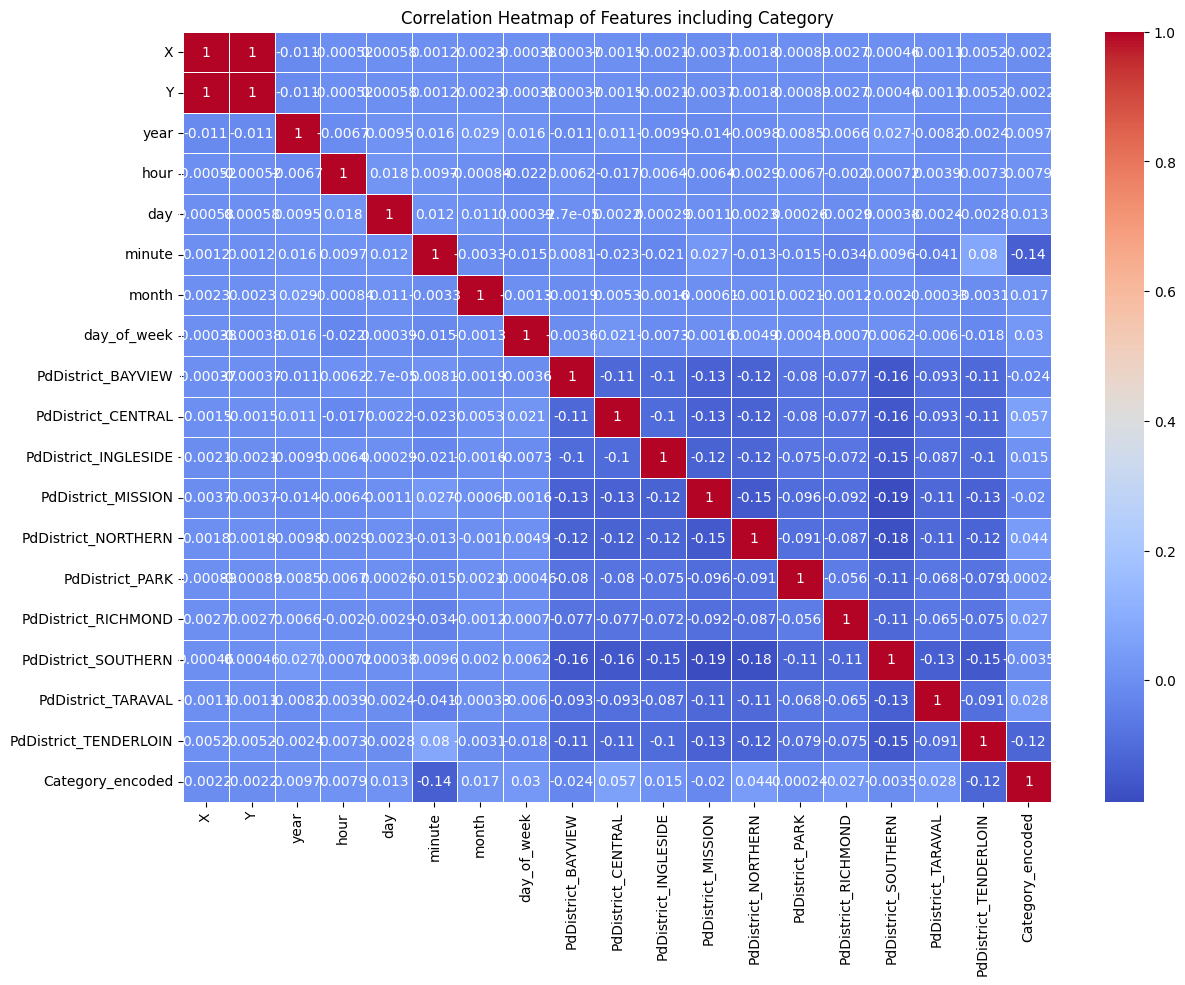

In [ ]:
feature_all=['PdDistrict', 'X', 'Y', 'year', 'hour','day','minute','month','day_of_week']

# Create a dataframe with these features
df_features = sf_crime[feature_all]

# One-hot encode the 'PdDistrict' column
df_features = pd.get_dummies(df_features, columns=['PdDistrict'])

# Convert boolean True/False to 1/0
df_features = df_features.astype(int)

# Check for missing values and handle them if necessary
df_features = df_features.dropna()

# Ensure all features are numeric
assert df_features.applymap(lambda x: isinstance(x, (int, float))).all().all(), "Some features are not numeric."

# Label encode the 'Category' column
label_encoder_category = LabelEncoder()
sf_crime['Category_encoded'] = label_encoder_category.fit_transform(sf_crime['Category'])
# Add 'Category_encoded' to the features
df_features['Category_encoded'] = sf_crime['Category_encoded']

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Extract the correlation of all features with 'Category_encoded'
category_corr = correlation_matrix['Category_encoded'].drop('Category_encoded')

# Sort correlations by absolute value in descending order
relevant_features = category_corr.abs().sort_values(ascending=False)

print("Correlation of features with Category_encoded:\n", relevant_features)

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features including Category')
plt.show()

##Data Preparation

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
label_encoder = LabelEncoder()

# Encode 'Category' (target variable)
train_df['Category'] = label_encoder.fit_transform(train_df['Category'])
test_df['Category'] = label_encoder.transform(test_df['Category'])

<ipython-input-18-9c2db736ad87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Category'] = label_encoder.fit_transform(train_df['Category'])
<ipython-input-18-9c2db736ad87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Category'] = label_encoder.transform(test_df['Category'])


In [ ]:
# Define the features and target variable
features = ['PdDistrict','hour','day','minute','day_of_week', 'month', 'X', 'Y']
X_train = train_df[features]
y_train = train_df['Category']
X_test = test_df[features]
y_test = test_df['Category']

# One-hot encode the 'PdDistrict' feature
X_train = pd.get_dummies(X_train, columns=['PdDistrict'])
X_test = pd.get_dummies(X_test, columns=['PdDistrict'])

# Ensure the columns match between train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

##Balancing Dataset

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Define the function to balance the dataset
def balance_dataset_smote_undersample(features, classes):

    # Separate features and target
    X = features
    y = classes

    # Calculate the number of samples for the largest class
    class_counts = y_train.value_counts()
    max_class_samples = class_counts.max()

    # Define SMOTE sampling strategy
    smote_strategy = {cls: max_class_samples for cls in class_counts.index}

    # Apply SMOTE to generate synthetic samples for minority classes
    smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)

    # Define undersampling strategy to balance the classes
    undersample_strategy = {cls: max_class_samples for cls in class_counts.index}
    undersample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
    X_res, y_res = undersample.fit_resample(X_smote, y_smote)

    # Combine the resampled features and target into a single DataFrame
    balanced_df = pd.concat([pd.DataFrame(X_res, columns=X_train.columns), pd.DataFrame(y_res, columns=['Category'])], axis=1)
    return balanced_df

# Apply the function to the train and test datasets
balanced_train_df = balance_dataset_smote_undersample(X_train, y_train)
# balanced_test_df = balance_dataset_smote_undersample(X_test, y_test)

# Verify the class distribution
print("Balanced Train Data:")
print(balanced_train_df['Category'].value_counts())
print("\nBalanced Test Data:")
print(y_test.value_counts())

Balanced Train Data:
Category
0    485205
1    485205
2    485205
3    485205
4    485205
5    485205
6    485205
7    485205
Name: count, dtype: int64

Balanced Test Data:
Category
4    280
0    164
3    112
6     96
2     50
1     34
7      1
5      1
Name: count, dtype: int64


#Model Training - XGBoost

In [ ]:
# Initialize the XGBoost model
model = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.6, random_state=42)

# Extract target variable from balanced_train_df
y_train_balanced = balanced_train_df['Category']
X_train_balanced = balanced_train_df.drop('Category', axis=1) # Drop target from features

# Train the model
model.fit(X_train_balanced, y_train_balanced) # Use balanced data and target

# Make predictions on the training data
y_train_pred = model.predict(X_train_balanced)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train_balanced, y_train_pred) # Use balanced target for training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Training Accuracy: {train_accuracy:.4f}")
print(f"XGBoost Test Accuracy: {test_accuracy:.4f}")

XGBoost Training Accuracy: 0.5570
XGBoost Test Accuracy: 0.3523


In [ ]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.30      0.33      0.31       164
           1       0.13      0.26      0.17        34
           2       0.00      0.00      0.00        50
           3       0.27      0.21      0.23       112
           4       0.53      0.58      0.55       280
           5       0.00      0.00      0.00         1
           6       0.22      0.12      0.16        96
           7       0.00      0.00      0.00         1

    accuracy                           0.35       738
   macro avg       0.18      0.19      0.18       738
weighted avg       0.34      0.35      0.34       738



##LSTM

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Define the STHSL model
# class STHSLModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(STHSLModel, self).__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         h_lstm, _ = self.lstm(x)
#         h_lstm = h_lstm[:, -1, :]  # Take the output of the last time step
#         out = self.fc(h_lstm)
#         return out

# # Prepare data for the model
# def prepare_sequences(data, seq_length=10):
#     sequences = []
#     targets = []
#     for i in range(len(data) - seq_length):
#         seq = data[i:i+seq_length]
#         target = data[i+seq_length, -1]
#         sequences.append(seq)
#         targets.append(target)
#     return torch.tensor(sequences, dtype=torch.float32), torch.tensor(targets, dtype=torch.long)

# # Assuming X_train, y_train, X_test, y_test are already defined
# X_train_seq, y_train_seq = prepare_sequences(X_train_balanced.values)
# X_test_seq, y_test_seq = prepare_sequences(X_test.values)

# # Create DataLoader
# train_dataset = TensorDataset(X_train_seq, y_train_seq)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# test_dataset = TensorDataset(X_test_seq, y_test_seq)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# # Model parameters
# input_dim = X_train_seq.shape[2]  # Number of features
# hidden_dim = 128
# output_dim = len(label_encoder.classes_)

# # Instantiate the model
# model = STHSLModel(input_dim, hidden_dim, output_dim)

# # Training setup
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 1  # Adjust the number of epochs as needed
# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0
#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     # Calculate average training loss
#     train_loss /= len(train_loader)

#     # Calculate training accuracy
#     model.eval()
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for inputs, labels in train_loader:
#             outputs = model(inputs)
#             preds = outputs.argmax(dim=1)
#             all_preds.extend(preds.numpy())
#             all_labels.extend(labels.numpy())

#     train_accuracy = accuracy_score(all_labels, all_preds)

#     # Calculate test accuracy
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             preds = outputs.argmax(dim=1)
#             all_preds.extend(preds.numpy())
#             all_labels.extend(labels.numpy())

#     test_accuracy = accuracy_score(all_labels, all_preds)

#     print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')

# # Final evaluation on the test set
# model.eval()
# all_preds = []
# all_labels = []
# with torch.no_grad():
#     for inputs, labels in test_loader:
#         outputs = model(inputs)
#         preds = outputs.argmax(dim=1)
#         all_preds.extend(preds.numpy())
#         all_labels.extend(labels.numpy())

# test_accuracy = accuracy_score(all_labels, all_preds)
# print(f'Final Test Accuracy: {test_accuracy}')

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.metrics import accuracy_score, confusion_matrix
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the STHSL model
# class STHSLModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(STHSLModel, self).__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         h_lstm, _ = self.lstm(x)
#         h_lstm = h_lstm[:, -1, :]  # Take the output of the last time step
#         out = self.fc(h_lstm)
#         return out

# # Prepare data for the model
# def prepare_sequences(data, seq_length=10):
#     sequences = []
#     targets = []
#     for i in range(len(data) - seq_length):
#         seq = data[i:i+seq_length]
#         target = data[i+seq_length-1, -1]  # Extract the target as the last element of the sequence
#         sequences.append(seq)
#         targets.append(target)
#     return torch.tensor(sequences, dtype=torch.float32), torch.tensor(targets, dtype=torch.long)

# # Assuming X_train, y_train, X_test, y_test are already defined
# X_train_seq, y_train_seq = prepare_sequences(X_train_balanced.values)
# X_test_seq, y_test_seq = prepare_sequences(X_test.values)

# # Check class distribution in the datasets
# print("Training set class distribution:", np.bincount(y_train_seq.numpy())) # y_train_seq is now 1D
# print("Test set class distribution:", np.bincount(y_test_seq.numpy())) # y_test_seq is now 1D

# # Create DataLoader
# train_dataset = TensorDataset(X_train_seq, y_train_seq)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# test_dataset = TensorDataset(X_test_seq, y_test_seq)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# # Model parameters
# input_dim = X_train_seq.shape[2]  # Number of features
# hidden_dim = 128
# output_dim = len(label_encoder.classes_)

# # Instantiate the model
# model = STHSLModel(input_dim, hidden_dim, output_dim)

# # Training setup
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 1  # Adjust the number of epochs as needed
# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0
#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     # Calculate average training loss
#     train_loss /= len(train_loader)

#     # Calculate training accuracy
#     model.eval()
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for inputs, labels in train_loader:
#             outputs = model(inputs)
#             preds = outputs.argmax(dim=1)
#             all_preds.extend(preds.numpy())
#             all_labels.extend(labels.numpy())

#     train_accuracy = accuracy_score(all_labels, all_preds)

#     # Calculate test accuracy
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             preds = outputs.argmax(dim=1)
#             all_preds.extend(preds.numpy())
#             all_labels.extend(labels.numpy())

#     test_accuracy = accuracy_score(all_labels, all_preds)

#     print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')

# # Final evaluation on the test set
# model.eval()
# all_preds = []
# all_labels = []
# with torch.no_grad():
#     for inputs, labels in test_loader:
#         outputs = model(inputs)
#         preds = outputs.argmax(dim=1)
#         all_preds.extend(preds.numpy())
#         all_labels.extend(labels.numpy())

# test_accuracy = accuracy_score(all_labels, all_preds)
# print(f'Final Test Accuracy: {test_accuracy}')

# # Check final class distribution in the predictions
# print("Predicted class distribution:", np.bincount(all_preds))

# # Compute confusion matrix
# cm = confusion_matrix(all_labels, all_preds)
# print("Confusion Matrix:")
# print(cm)

# # Plot confusion matrix with class labels
# class_labels = label_encoder.classes_
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticks=np.arange(len(class_labels))+0.5, yticks=np.arange(len(class_labels))+0.5)
# plt.xticks(ticks=np.arange(len(class_labels))+0.5, labels=class_labels, rotation=45, ha='right')
# plt.yticks(ticks=np.arange(len(class_labels))+0.5, labels=class_labels, rotation=0)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Example: Trying a RandomForest
rf_model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predictions on training data
y_train_pred = rf_model.predict(X_train_balanced)
# Predictions on test data
y_test_pred = rf_model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Training Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [1192663, 3881640]

In [ ]:
report = classification_report(y_test, y_test_pred)
print(report)

##Neural Network 2 hidden layers

In [ ]:
from sklearn import preprocessing as prepro
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from collections import Counter
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Convert y to categorical (assuming y is numeric)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Preprocessing and Standardize X_train and X_test
X_train = prepro.StandardScaler().fit_transform(balanced_train_df)
X_test = prepro.StandardScaler().fit_transform(X_test)

# Convert y_train to a NumPy array of floating-point values
y_train_float = y_train.astype(np.float32)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_float)

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

# Ensure that y_train_categorical and y_test_categorical are numpy arrays
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_categorical)

# Train the model
history = model.fit(X_train, y_train_tensor, validation_data=(X_test, y_test_categorical), batch_size=64, epochs=8)

for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()

In [ ]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Retrieve original class names from LabelEncoder
class_labels = label_encoder.classes_

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
plt.xticks(rotation=90)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

##Neural Network - 1 hidden layer with Smaller Dimension

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

# Ensure that y_train_categorical and y_test_categorical are numpy arrays
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_categorical)

# Train the model
history = model.fit(X_train, y_train_tensor, validation_data=(X_test, y_test_categorical), batch_size=64, epochs=8) #steps_per_epoch=2195

for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()

In [ ]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Retrieve original class names from LabelEncoder
class_labels = label_encoder.classes_

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

##Transforming Time into Cyclic Representations

###XGBoost

In [ ]:
# Define a function to transform time features into cyclic representations
def transform_cyclic_features(df):
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)  # Assuming day of month ranges from 1 to 31
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

# Apply the transformation to both training and test datasets
train_df = transform_cyclic_features(train_df)
test_df = transform_cyclic_features(test_df)

# Select features and labels
features = ['PdDistrict', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'X', 'Y']
X_train = train_df[features]
y_train = train_df['Category']
X_test = test_df[features]
y_test = test_df['Category']

# Convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both train and test sets have the same dummy variables
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost model
model = xgb.XGBClassifier(objective='multi:softprob', num_class=39, eval_metric='mlogloss', use_label_encoder=False)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plotting feature importances
xgb.plot_importance(model)
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

##Neural Network

In [ ]:
# Define a function to transform time features into cyclic representations
def transform_cyclic_features(df):
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)  # Assuming day of month ranges from 1 to 31
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

# Apply the transformation to both training and test datasets
train_df = transform_cyclic_features(train_df)
test_df = transform_cyclic_features(test_df)

# Select features and labels
features = ['PdDistrict', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'X', 'Y']
X_train = train_df[features]
y_train = train_df['Category']
X_test = test_df[features]
y_test = test_df['Category']

# Convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both train and test sets have the same dummy variables
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
# Convert y to categorical (assuming y is numeric)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Preprocessing and Standardize X_train and X_test
X_train = prepro.StandardScaler().fit_transform(X_train)
X_test = prepro.StandardScaler().fit_transform(X_test)

# Convert y_train to a NumPy array of floating-point values
y_train_float = y_train.astype(np.float32)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_float)

In [ ]:
model = Sequential()

# model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

# Ensure that y_train_categorical and y_test_categorical are numpy arrays
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Convert y_train to a Tensor
y_train_tensor = tf.convert_to_tensor(y_train_categorical)

# Train the model
history = model.fit(X_train, y_train_tensor, validation_data=(X_test, y_test_categorical), batch_size=16, epochs=10) #steps_per_epoch=2195

for j in list(history.history.keys()):
    plt.plot(history.history[j])
    plt.title(j + ' over epochs')
    plt.ylabel(j)
    plt.xlabel('Epochs')
    plt.show()